Perform EDA such as number of data samples, number of features, number of classes, number of data samples per class, removing missing values, conversion to numbers, explore dimensionality, type the mean or average value, and using seaborn library to plot different graphs. Consider one of the datasets given below. 

In [1]:
# Importing the Dataset
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Going through the given Dataset
df = pd.read_excel('/content/drive/MyDrive/foodcropstats.xlsx', sheet_name="CropStats")
df.rename(columns = {'Unnamed: 0':'SrNo'}, inplace = True)
print("First ten samples in the dataset = ")
df.head(10)

First ten samples in the dataset = 


,SrNo,Harvest_year,nation,subnation,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha),admin2,notes
0,0,1902,Austria,NaN,wheat,NaN,NaN,1902,1.31,NaN,NaN
1,1,1903,Austria,NaN,wheat,NaN,NaN,1903,1.47,NaN,NaN
2,2,1904,Austria,NaN,wheat,NaN,NaN,1904,1.27,NaN,NaN
3,3,1905,Austria,NaN,wheat,NaN,NaN,1905,1.33,NaN,NaN
4,4,1906,Austria,NaN,wheat,NaN,NaN,1906,1.28,NaN,NaN
5,5,1907,Austria,NaN,wheat,NaN,NaN,1907,1.37,NaN,NaN
6,6,1908,Austria,NaN,wheat,NaN,NaN,1908,1.36,NaN,NaN
7,7,1909,Austria,NaN,wheat,NaN,NaN,1909,1.35,NaN,NaN
8,8,1910,Austria,NaN,wheat,NaN,NaN,1910,1.18,NaN,NaN
9,9,1911,Austria,NaN,wheat,NaN,NaN,1911,1.37,NaN,NaN


In [3]:
# Size and Dimensions of Original Dataset
num_samples = df.size
print("Total samples in the original dataset = ", num_samples)

num_features = len(df.columns)
print("Total features in the original dataset = ", num_features)

shape_df = df.shape
print("Therefore shape of the original dataset = ", shape_df)

dim_df = df.ndim
print("Dimensions of the original dataset = ", dim_df)

Total samples in the original dataset =  403777
Total features in the original dataset =  11
Therefore shape of the original dataset =  (36707, 11)
Dimensions of the original dataset =  2


In [17]:
# Dropping a whole column from dataset
df2 = df.drop(['admin2', 'notes'], axis=1)
print("Dataset with dropped columns admin2 and notes: ")
df2

Dataset with dropped columns admin2 and notes: 


,SrNo,Harvest_year,nation,subnation,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
0,0,1902,Austria,NaN,wheat,NaN,NaN,1902,1.310000
1,1,1903,Austria,NaN,wheat,NaN,NaN,1903,1.470000
2,2,1904,Austria,NaN,wheat,NaN,NaN,1904,1.270000
3,3,1905,Austria,NaN,wheat,NaN,NaN,1905,1.330000
4,4,1906,Austria,NaN,wheat,NaN,NaN,1906,1.280000
...,...,...,...,...,...,...,...,...,...
36702,36702,2013,China,zhejiang,wheat,75520.0,278300.0,2013,3.685117
36703,36703,2014,China,zhejiang,wheat,82120.0,309500.0,2014,3.768875
36704,36704,2015,China,zhejiang,wheat,89800.0,351300.0,2015,3.912027
36705,36705,2016,China,zhejiang,wheat,76590.0,253900.0,2016,3.315054


In [18]:
# Size and Dimensions of New Dataset after dropping columns
num_samples = df2.size
print("Total samples in the original dataset = ", num_samples)

num_features = len(df2.columns)
print("Total features in the original dataset = ", num_features)

shape_df = df2.shape
print("Therefore shape of the original dataset = ", shape_df)

dim_df = df2.ndim
print("Dimensions of the original dataset = ", dim_df)

Total samples in the original dataset =  330363
Total features in the original dataset =  9
Therefore shape of the original dataset =  (36707, 9)
Dimensions of the original dataset =  2


In [19]:
# Replacing values with NaN to 0 as there are no missing values
df2.isnull()
df2.fillna(0)
df2.sort_values(by=['crop'])

,SrNo,Harvest_year,nation,subnation,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
29554,29554,1960,Morocco,NaN,cereals,4717.00,3790.000000,1960,0.800000
29565,29565,1971,Morocco,NaN,cereals,4608.00,5320.300000,1971,1.150000
29566,29566,1972,Morocco,NaN,cereals,4537.00,5113.100000,1972,1.130000
29567,29567,1973,Morocco,NaN,cereals,4605.00,3138.100000,1973,0.680000
29568,29568,1974,Morocco,NaN,cereals,4461.00,4769.400000,1974,1.070000
...,...,...,...,...,...,...,...,...,...
28795,28795,1925,United States,IDAHO,winter wheat,178463.88,270030.481167,1925,1.513158
28796,28796,1925,United States,ILLINOIS,winter wheat,902436.40,971042.891356,1925,1.076024
28797,28797,1925,United States,INDIANA,winter wheat,733280.16,715055.519268,1925,0.975146
28791,28791,1925,United States,CALIFORNIA,winter wheat,244022.04,303614.195515,1925,1.244152


In [20]:
#  Replacing NaN values with 0 and assigning numeric values to different classes of the crops
df2['production (tonnes)'] = df2['production (tonnes)'].fillna(0)
df2['subnation'] = df2['subnation'].fillna(0)
df2['hectares (ha)'] = df2['hectares (ha)'].fillna(0)

df2['crop'].replace(['cereals', 'maize', 'wheat', 'spring wheat', 'winter wheat'], [0, 1, 2, 3, 4], inplace=True)
df2

,SrNo,Harvest_year,nation,subnation,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
0,0,1902,Austria,0,2,0.0,0.0,1902,1.310000
1,1,1903,Austria,0,2,0.0,0.0,1903,1.470000
2,2,1904,Austria,0,2,0.0,0.0,1904,1.270000
3,3,1905,Austria,0,2,0.0,0.0,1905,1.330000
4,4,1906,Austria,0,2,0.0,0.0,1906,1.280000
...,...,...,...,...,...,...,...,...,...
36702,36702,2013,China,zhejiang,2,75520.0,278300.0,2013,3.685117
36703,36703,2014,China,zhejiang,2,82120.0,309500.0,2014,3.768875
36704,36704,2015,China,zhejiang,2,89800.0,351300.0,2015,3.912027
36705,36705,2016,China,zhejiang,2,76590.0,253900.0,2016,3.315054


In [21]:
# Description of the new dataframe
df2.describe()

,SrNo,Harvest_year,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
count,36707.000000,36707.000000,36707.000000,3.670700e+04,3.670700e+04,36707.000000,34694.000000
mean,18353.000000,1954.416760,1.873294,6.131803e+05,1.458293e+06,1954.402566,2.659986
std,10596.542502,39.055266,0.959964,1.526028e+06,4.781570e+06,39.051385,2.229322
min,0.000000,1861.000000,0.000000,0.000000e+00,0.000000e+00,1861.000000,0.053289
25%,9176.500000,1925.000000,1.000000,2.063868e+04,3.524692e+04,1925.000000,1.124418
50%,18353.000000,1957.000000,2.000000,1.396146e+05,2.514000e+05,1957.000000,1.851355
75%,27529.500000,1987.000000,2.000000,5.710017e+05,1.073721e+06,1987.000000,3.439073
max,36706.000000,2019.000000,4.000000,3.147000e+07,1.342875e+08,2019.000000,17.168477


In [22]:
# Mean yeild(tonnes/ha) of crops
df2.groupby('yield(tonnes/ha)')['crop'].mean()

yield(tonnes/ha)
0.053289     2.0
0.056888     2.0
0.076369     2.0
0.076557     2.0
0.078187     2.0
            ... 
13.495326    1.0
14.123015    1.0
14.436860    1.0
14.750705    1.0
17.168477    1.0
Name: crop, Length: 15992, dtype: float64

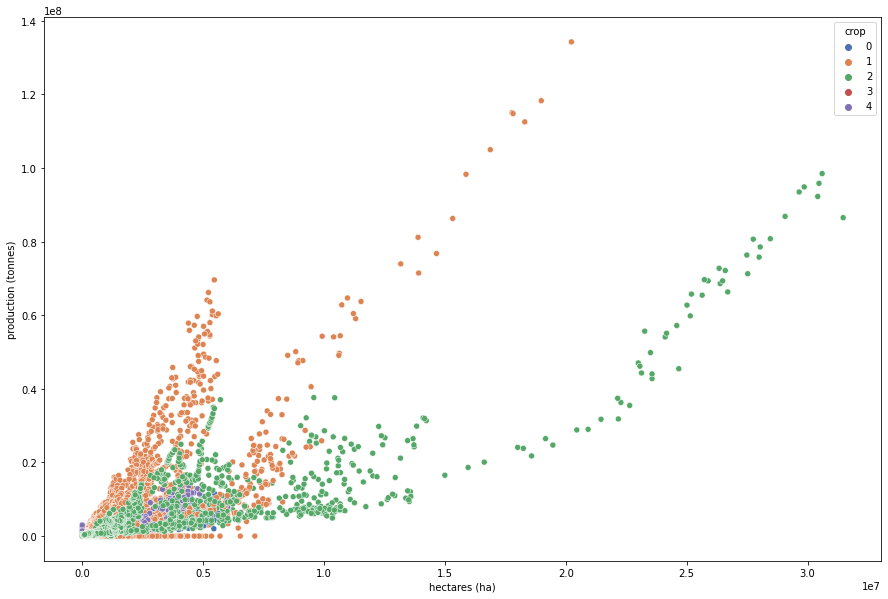

In [23]:
# Scatterplot of production vs hectares in dataset
plt.figure(figsize=(15,10))
sns.scatterplot(data=df2, x="hectares (ha)", y="production (tonnes)", hue="crop", palette="deep")

In [67]:
df_copy = df2.copy()
df_aus = df_copy[(df_copy["nation"] == 'Austria')]
df_aus

,SrNo,Harvest_year,nation,subnation,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
0,0,1902,Austria,0,2,0.0,0.0,1902,1.3100
1,1,1903,Austria,0,2,0.0,0.0,1903,1.4700
2,2,1904,Austria,0,2,0.0,0.0,1904,1.2700
3,3,1905,Austria,0,2,0.0,0.0,1905,1.3300
4,4,1906,Austria,0,2,0.0,0.0,1906,1.2800
...,...,...,...,...,...,...,...,...,...
111,111,2013,Austria,0,2,297286.0,1597706.0,2013,5.3743
112,112,2014,Austria,0,2,304645.0,1804018.0,2014,5.9217
113,113,2015,Austria,0,2,302965.0,1725737.0,2015,5.6962
114,114,2016,Austria,0,2,315088.0,1970364.0,2016,6.2534


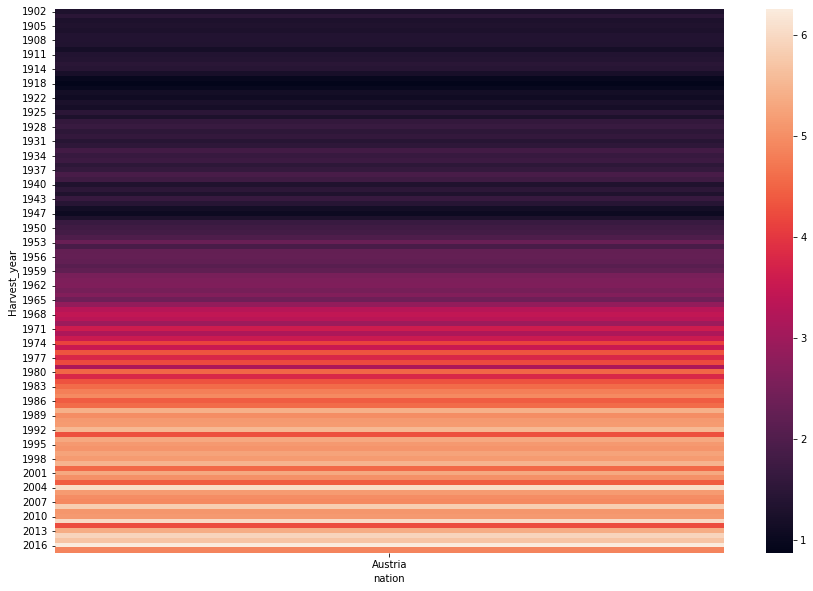

In [68]:
# Heatmap of Harvest Year for Yield of Wheat in Austria
df_aus = df_aus.dropna()
df_aus = df_aus.reset_index(drop=True)
df2_hmap = df_aus.pivot("Harvest_year", "nation", "yield(tonnes/ha)")
plt.figure(figsize=(15,10))
ax = sns.heatmap(df2_hmap)